<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/ML_AI24_HT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

In [6]:
!pip install catboost -q


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os

import pandas as pd
from catboost import CatBoostClassifier
from tqdm import tqdm

INPUT_DIR = './data'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [8]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [9]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
        object_cols.append(idx)

431it [00:00, 39092.30it/s]


In [10]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=3)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.5
0:	learn: 0.2082395	total: 498ms	remaining: 996ms
1:	learn: 0.1360790	total: 756ms	remaining: 378ms
2:	learn: 0.1180984	total: 1.08s	remaining: 0us


In [11]:
predictions = cb.predict_proba(df_test.fillna(''))

In [12]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
sub.head()

,TransactionID,isFraud
0,3404559,0.978714
1,3404560,0.935724
2,3404561,0.946864
3,3404562,0.978714
4,3404563,0.970637


In [13]:
# Сохранение submission
sub.to_csv('submission_baseline.csv', index=False)

In [18]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 432 entries, isFraud to DeviceInfo
dtypes: float64(399), int64(2), object(31)
memory usage: 1.3+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172981 entries, 0 to 172980
Columns: 431 entries, TransactionAmt to DeviceInfo
dtypes: float64(399), int64(1), object(31)
memory usage: 568.8+ MB


(None, None)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

sns.set()

%matplotlib inline

In [2]:
def reduce_mem_usage(df):
    NAlist = []

    for col in ['card4', 'card6']:
        df[col].fillna(df[col].mode()[0], inplace=True)

    for col in ['card1', 'card2', 'card3', 'card5']:
        df[col].fillna(-1, inplace=True)

    df['addr1'].fillna(df['addr1'].mode()[0], inplace=True)
    df['addr2'].fillna(-1, inplace=True)

    df['dist1'].fillna(df['dist1'].median(), inplace=True)
    df['dist2'].fillna(0, inplace=True)

    for col in df.columns:
        if col.startswith('C'):
            df[col].fillna(df[col].median(), inplace=True)

        if col.startswith('M'):
            df[col].fillna(df[col].mode()[0], inplace=True)

        if col.startswith('V'):
            df[col].fillna(df[col].median(), inplace=True)

    for col in tqdm(df.columns):
        col_type = df[col].dtype

        if col_type != object:
            if not np.isfinite(df[col]).all():
                NAlist.append(col)
                df[col].fillna(df[col].min() - 1, inplace=True)

            col_min_value = df[col].min()
            col_max_value = df[col].max()

            if pd.api.types.is_integer_dtype(df[col]) or np.all(df[col] == df[col].astype(int)):
                if col_min_value >= 0:
                    if col_max_value < np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                    elif col_max_value < np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                    elif col_max_value < np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if col_min_value > np.iinfo(np.int8).min and col_max_value < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif col_min_value > np.iinfo(np.int16).min and col_max_value < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif col_min_value > np.iinfo(np.int32).min and col_max_value < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    else:
                        df[col] = df[col].astype(np.int64)
            else:
                if col_max_value < np.finfo(np.float16).max and col_min_value > np.finfo(np.float16).min:
                    df[col] = df[col].astype(np.float16)
                elif col_max_value < np.finfo(np.float32).max and col_min_value > np.finfo(np.float32).min:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df, NAlist


INPUT_DIR = './data'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity
df_train, df_train_NAlist = reduce_mem_usage(df_train)

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
del test_transaction, test_identity
df_test, df_test_NAlist = reduce_mem_usage(df_test)

C:\Temp\ipykernel_18532\3393963716.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Temp\ipykernel_18532\3393963716.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417559 entries, 0 to 417558
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float16(57), float32(23), int16(17), int8(11), object(31), uint16(32), uint32(3), uint8(260)
memory usage: 332.5+ MB


In [4]:
df_train.shape

(417559, 434)

In [4]:
df_train_num = df_train.select_dtypes('number')
df_train_cat = df_train.select_dtypes(exclude='number')

df_test_num = df_test.select_dtypes('number')
df_test_cat = df_test.select_dtypes(exclude='number')

В процессе сжатия данный, мы заполнили все NaN'ы для числовых признаков

In [5]:
train_num_cols_missing = df_train_num.columns[df_train_num.isna().sum() > 0]
test_num_cols_missing = df_test_num.columns[df_test_num.isna().sum() > 0]

print('Незаполненные числовые принаки train: ', train_num_cols_missing)
print('Незаполненные числовые принаки test: ', test_num_cols_missing)

Незаполненные числовые принаки train:  Index([], dtype='object')
Незаполненные числовые принаки test:  Index([], dtype='object')


In [6]:
train_cat_cols_missing = df_train_cat.columns[df_train_cat.isna().sum() > 0]
test_cat_cols_missing = df_test_cat.columns[df_test_cat.isna().sum() > 0]

print('Незаполненные категориальные принаки train: ', train_cat_cols_missing)
print('Незаполненные категориальные принаки test: ', test_cat_cols_missing)

Незаполненные категориальные принаки train:  Index(['P_emaildomain', 'R_emaildomain', 'id_12', 'id_15', 'id_16', 'id_23',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')
Незаполненные категориальные принаки test:  Index(['P_emaildomain', 'R_emaildomain', 'id_12', 'id_15', 'id_16', 'id_23',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


Посмотрим какие значения имеют признаки M1-M9

In [8]:
for i in range(1, 10):
    print(f'M{i}:', df_train[f'M{i}'].unique())

M1: ['T' 'F']
M2: ['T' 'F']
M3: ['T' 'F']
M4: ['M2' 'M0' 'M1']
M5: ['F' 'T']
M6: ['T' 'F']
M7: ['F' 'T']
M8: ['F' 'T']
M9: ['T' 'F']


Признаки M1-3, M5-9 - бинарные, можем перевести их в числовые, nan заполнить нулями

In [7]:
for i in range(1, 10):
    if i == 4:
        continue
    df_train[f'M{i}'] = df_train[f'M{i}'].apply(lambda x: 1 if x == 'T' else 0)
    df_test[f'M{i}'] = df_test[f'M{i}'].apply(lambda x: 1 if x == 'T' else 0)

Посмотрим на значения id-колонок

In [10]:
for col in train_cat_cols_missing.to_list():
    if 'id' in col:
        print(f'{col}:', df_train[col].unique())

id_12: [nan 'NotFound' 'Found']
id_15: [nan 'New' 'Found' 'Unknown']
id_16: [nan 'NotFound' 'Found']
id_23: [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
id_27: [nan 'Found' 'NotFound']
id_28: [nan 'New' 'Found']
id_29: [nan 'NotFound' 'Found']
id_30: [nan 'Android 7.0' 'iOS 11.1.2' 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Window

Колонки id_12, id_16, id_27, id_28, id_29 и id_35-38 тоже являются бинарными, переведем их в числовые, заполним пропуски нулями

In [8]:
binary_id_cols = [12, 16, 27, 28, 29, 35, 36, 37, 38]
for i in binary_id_cols:
    df_train[f'id_{i}'] = df_train[f'id_{i}'].apply(lambda x: 1 if x == 'T' or 'Found' else 0)
    df_test[f'id_{i}'] = df_test[f'id_{i}'].apply(lambda x: 1 if x == 'T' or 'Found' else 0)

Посмотрим на оставшиеся категориальные колонки с пропусками:

In [9]:
cat_cols = df_train.select_dtypes(exclude='number')
missing_cat_cols = list(cat_cols.columns[cat_cols.isna().sum() > 0])
missing_cat_cols

['P_emaildomain',
 'R_emaildomain',
 'id_15',
 'id_23',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'DeviceType',
 'DeviceInfo']

Посмотрим, являются ли они бинарными:

In [13]:
[print(col) for col in missing_cat_cols if len(list(cat_cols.card4.value_counts().index)) == 2]

[]

#### Проанализируем целевую переменную

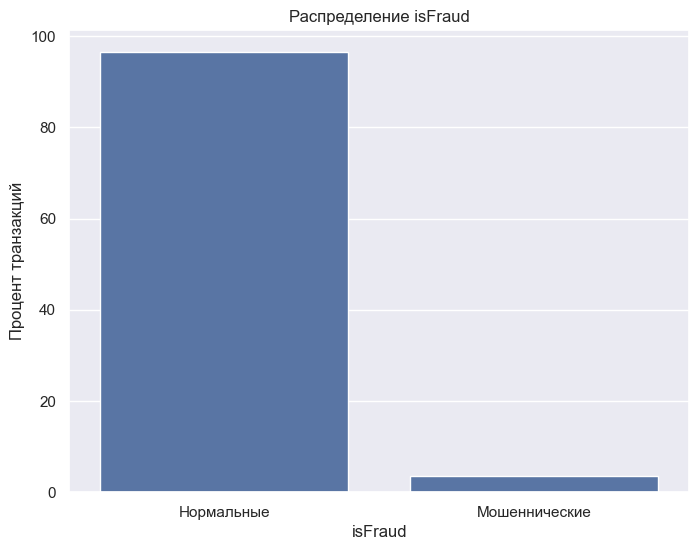


Доля мошеннических транзакций: 3.53%


In [14]:
fraud_distribution = df_train['isFraud'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_distribution.index, y=fraud_distribution.values)
plt.title('Распределение isFraud')
plt.xlabel('isFraud')
plt.ylabel('Процент транзакций')
plt.xticks([0, 1], ['Нормальные', 'Мошеннические'])
plt.show()

print(f"\nДоля мошеннических транзакций: {df_train['isFraud'].value_counts()[1] / len(df_train) * 100:.2f}%")

Классы сильно несбалансированны


Посмотрим на линейную связь числовых признаков с целевой переменной

C:\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


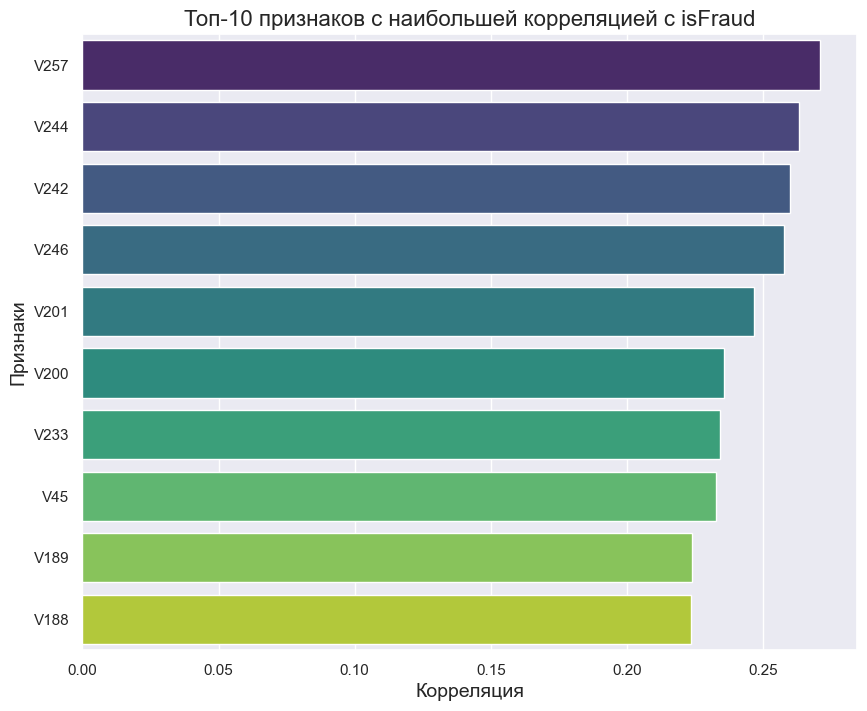

In [15]:
correlations = df_train.select_dtypes('number').corrwith(df_train['isFraud']).sort_values(ascending=False)
top_correlations = correlations[1:11]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_correlations.values, y=top_correlations.index, hue=top_correlations.index, palette='viridis',
            legend=False)
plt.title('Топ-10 признаков с наибольшей корреляцией с isFraud', fontsize=16)
plt.xlabel('Корреляция', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.show()

Посмотрим на корреляцию числовых признаков cards и TransactionAmt

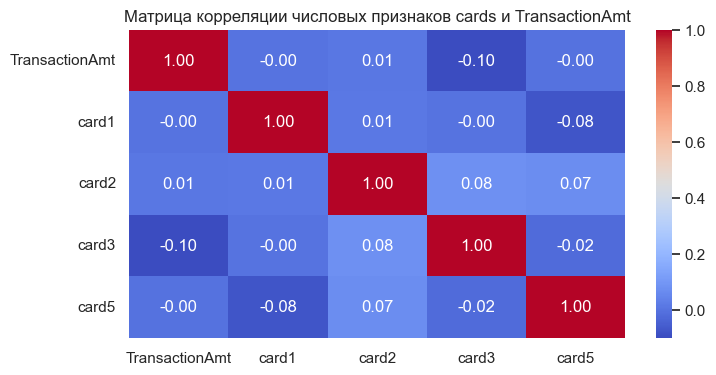

In [16]:
corr_matrix = df_train[['TransactionAmt', 'card1', 'card2', 'card3', 'card5']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Матрица корреляции числовых признаков cards и TransactionAmt')
plt.show()

Корреляция незначительна

Посмотрим на корреляцию числовых признаков C1-C14

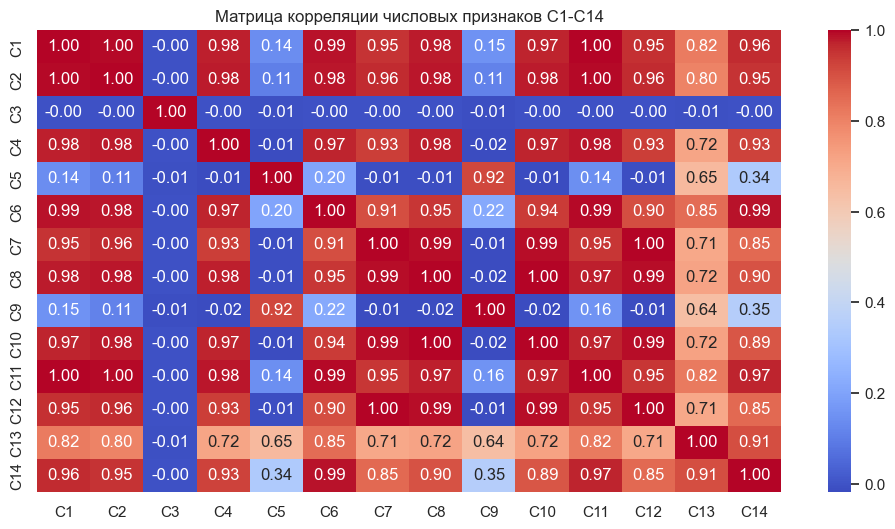

In [17]:
corr_matrix = df_train[[col for col in df_train.columns if col.startswith('C')]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Матрица корреляции числовых признаков C1-C14')
plt.show()

Видно, что достаточно много признаков имеют сильную корреляцию

Посмотрим на зависимость категориальных признаков с целевой переменной с помощью хи-квадрат и V Крамера

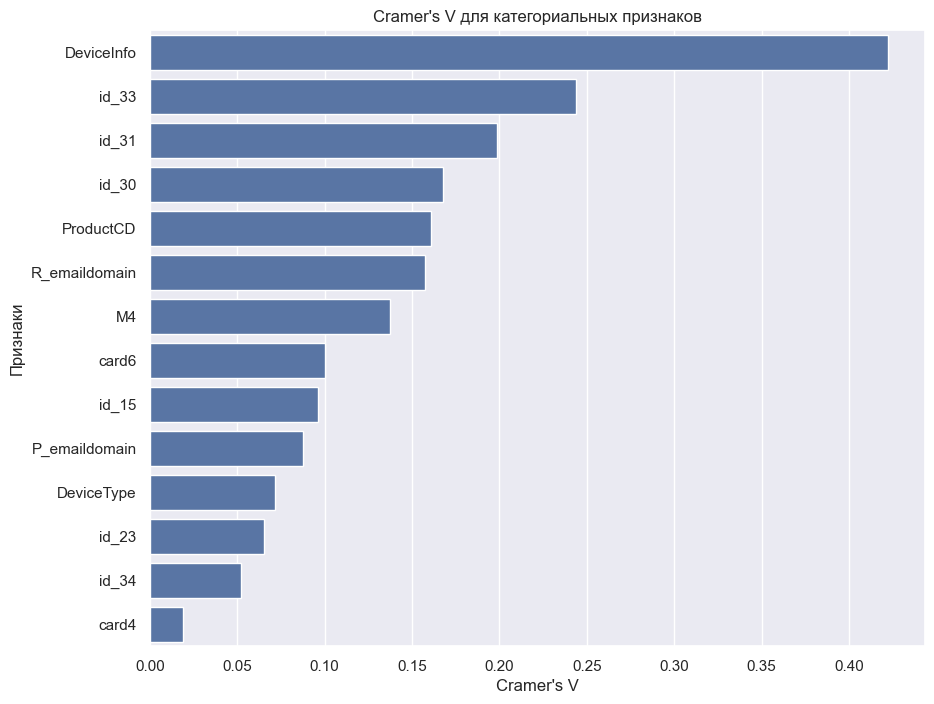

In [18]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k - 1), (r - 1)))


categorical_cols = df_train.select_dtypes(include='object').columns
cramer_scores = {col: cramers_v(df_train[col], df_train['isFraud']) for col in categorical_cols}

cramer_df = pd.DataFrame({'Feature': categorical_cols, 'Cramer\'s V': cramer_scores.values()})
cramer_df = cramer_df.sort_values(by='Cramer\'s V', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=cramer_df['Cramer\'s V'], y=cramer_df['Feature'])
plt.title('Cramer\'s V для категориальных признаков')
plt.xlabel('Cramer\'s V')
plt.ylabel('Признаки')
plt.show()

Видим, что DeviceInfo больше всего связан с целевой переменной

Можно заметить, что данные содержат признак, отвечающий за момент времени совершения транзакции - `TransactionDT`. Посмотрим на его распределение

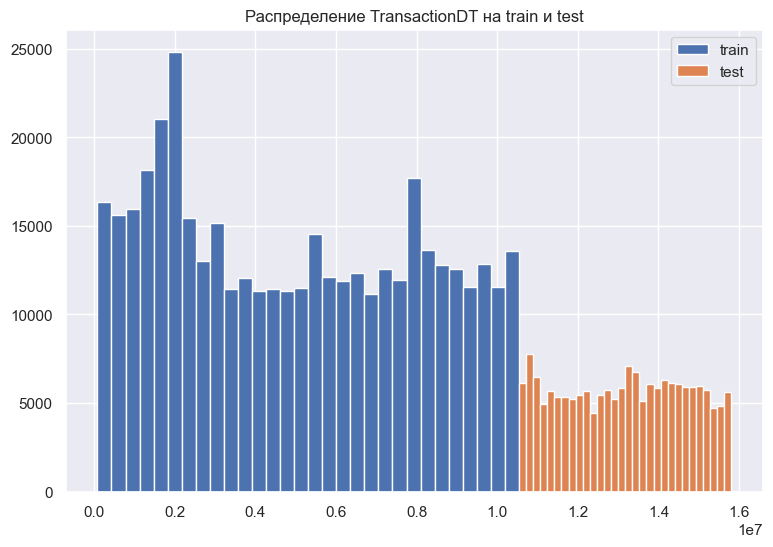

In [19]:
plt.figure(figsize=(9, 6))
plt.title('Распределение TransactionDT на train и test')
plt.hist(df_train['TransactionDT'], label='train', bins=30)
plt.hist(df_test['TransactionDT'], label='test', bins=30)
plt.legend(loc='best')
plt.show()

Предположим, что время для этого признака измеряется в секундах, тогда похоже на то, что данные из трейна и теста - это данные за полгода. Тогда обучающая часть выборки включает в себя данные за 4 месяца, а тестовая - за следующие 2.

Разобьем трейн на фолды по месяцам

In [10]:
def split_into_folds(df: pd.DataFrame, useTimeDelta=False):
    month_delta = pd.Timedelta(days=30) if useTimeDelta else 3600 * 24 * 30

    fold0_idx = df[df['TransactionDT'] < df['TransactionDT'].min() + month_delta].index
    fold1_idx = df[(df['TransactionDT'].min() + month_delta <= df['TransactionDT']) & (
            df['TransactionDT'] < df['TransactionDT'].min() + 2 * month_delta)].index
    fold2_idx = df[(df['TransactionDT'].min() + 2 * month_delta <= df['TransactionDT']) & (
            df['TransactionDT'] < df['TransactionDT'].min() + 3 * month_delta)].index
    fold3_idx = df[df['TransactionDT'].min() + 3 * month_delta <= df['TransactionDT']].index

    return fold0_idx, fold1_idx, fold2_idx, fold3_idx

Проверим дубликаты

In [11]:
print("Количество дубликатов в данных:", df_train.duplicated().sum())

Количество дубликатов в данных: 0


Оставшиеся признаки не бинарны, заполним их новой категорией и закодируем с помощью LabelEncoder. Переведем objects в тип category

In [11]:
def preprocess_data(df_train: pd.DataFrame, df_test: pd.DataFrame):
    for col in tqdm(df_train.columns.drop('isFraud')):
        if df_train[col].dtype == 'O':
            if col in missing_cat_cols:
                df_train[col] = df_train[col].fillna('unknown')
                df_test[col] = df_test[col].fillna('unknown')

                label_encoder = LabelEncoder()
                label_encoder.fit(list(df_train[col]) + list(df_test[col]))

                df_train[col] = label_encoder.transform(df_train[col])
                df_test[col] = label_encoder.transform(df_test[col])

            df_train[col] = df_train[col].astype('category')
            df_test[col] = df_test[col].astype('category')

    return df_train, df_test

In [12]:
df_train, df_test = preprocess_data(df_train, df_test)

100%|██████████| 433/433 [00:06<00:00, 68.34it/s] 


In [13]:
categorical_columns = df_train.select_dtypes(exclude='number').columns.to_list()
for col in categorical_columns:
    le = LabelEncoder()
    le.fit(list(df_train[col]) + list(df_test[col]))
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

Посмотрим на распределение значений числового признака `TransactionAmt` в обучающей выборке

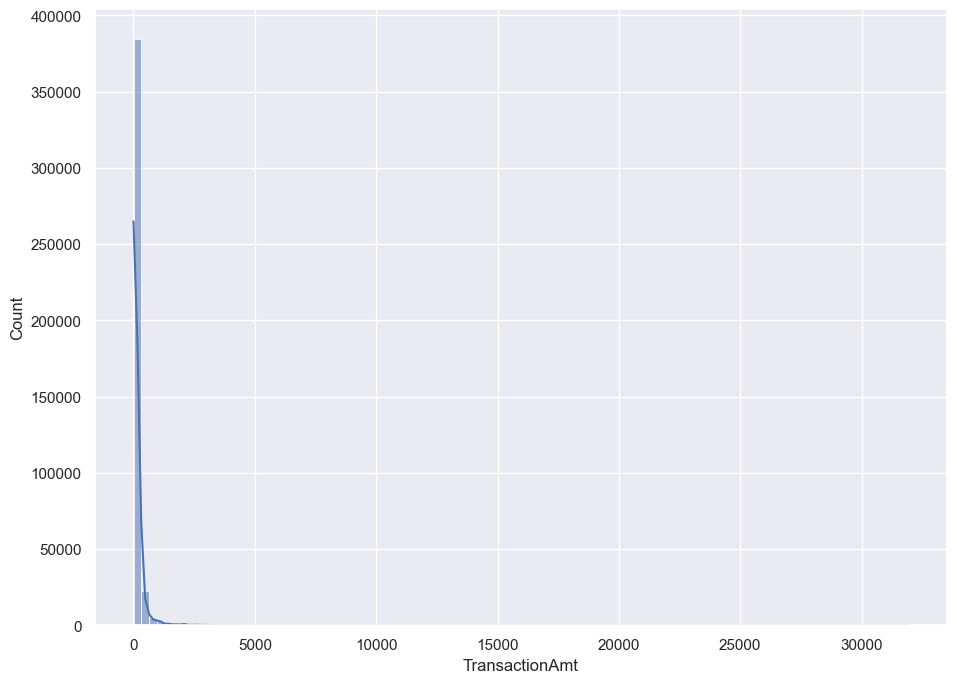

In [24]:
plt.figure(figsize=(11, 8))
sns.histplot(df_train['TransactionAmt'], kde=True, bins=100)
plt.show()

Как видно, распределение очень сильно смещено. Попробуем прологорифмировать признак и добавим результат в данные как новый, но сначала построим бейзлайн и посмотрим на важность признаков

In [14]:
def train_baseline(df_train: pd.DataFrame, df_test: pd.DataFrame) -> pd.DataFrame:
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'metric': 'auc',
        'n_jobs': -1,
        'n_estimators': 2000,
        'seed': 13,
        'early_stopping_rounds': 200,
        'verbose': -1,
    }

    scores = []

    feature_importances = pd.DataFrame()
    feature_importances['feature'] = df_train.columns.drop('isFraud')

    test_preds = []

    for i in range(len(folds_idx)):
        X_train = df_train.drop(folds_idx[i], axis=0)
        y_train = X_train['isFraud'].values
        X_val = df_train.iloc[folds_idx[i]]
        y_val = X_val['isFraud'].values
        X_train = X_train.drop('isFraud', axis=1)
        X_val = X_val.drop('isFraud', axis=1)

        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
        lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

        feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

        y_pred = lgb_model.predict(X_val)
        score_fold = roc_auc_score(y_val, y_pred)
        scores.append(score_fold)
        y_test_pred = lgb_model.predict(df_test)
        test_preds.append(y_test_pred)

    for i in range(len(scores)):
        print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
    print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

    fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
    feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
    return feature_importances

In [15]:
def plot_feature_importances(feature_importances: pd.DataFrame):
    plt.figure(figsize=(15, 15))
    sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature',
                palette="BuGn_r", hue='feature', legend=False)
    plt.title('Top feature importances')
    plt.show()

In [16]:
folds_idx = split_into_folds(df_train)

In [18]:
train = df_train.drop(['TransactionID'], axis=1)
test = df_test.drop(['TransactionID'], axis=1)

feature_importances = train_baseline(train, test)
feature_importances.head()

C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 0, AUC-ROC: 0.90197
Fold 1, AUC-ROC: 0.92983
Fold 2, AUC-ROC: 0.93023
Fold 3, AUC-ROC: 0.90611
CV AUC-ROC: 0.91703


,feature,fold_0,fold_1,fold_2,fold_3,average
0,TransactionDT,1619,1251,1292,452,1153.50
1,TransactionAmt,1334,1019,1082,349,946.00
2,ProductCD,88,57,66,52,65.75
3,card1,1697,1209,1348,462,1179.00
4,card2,1195,957,1071,371,898.50


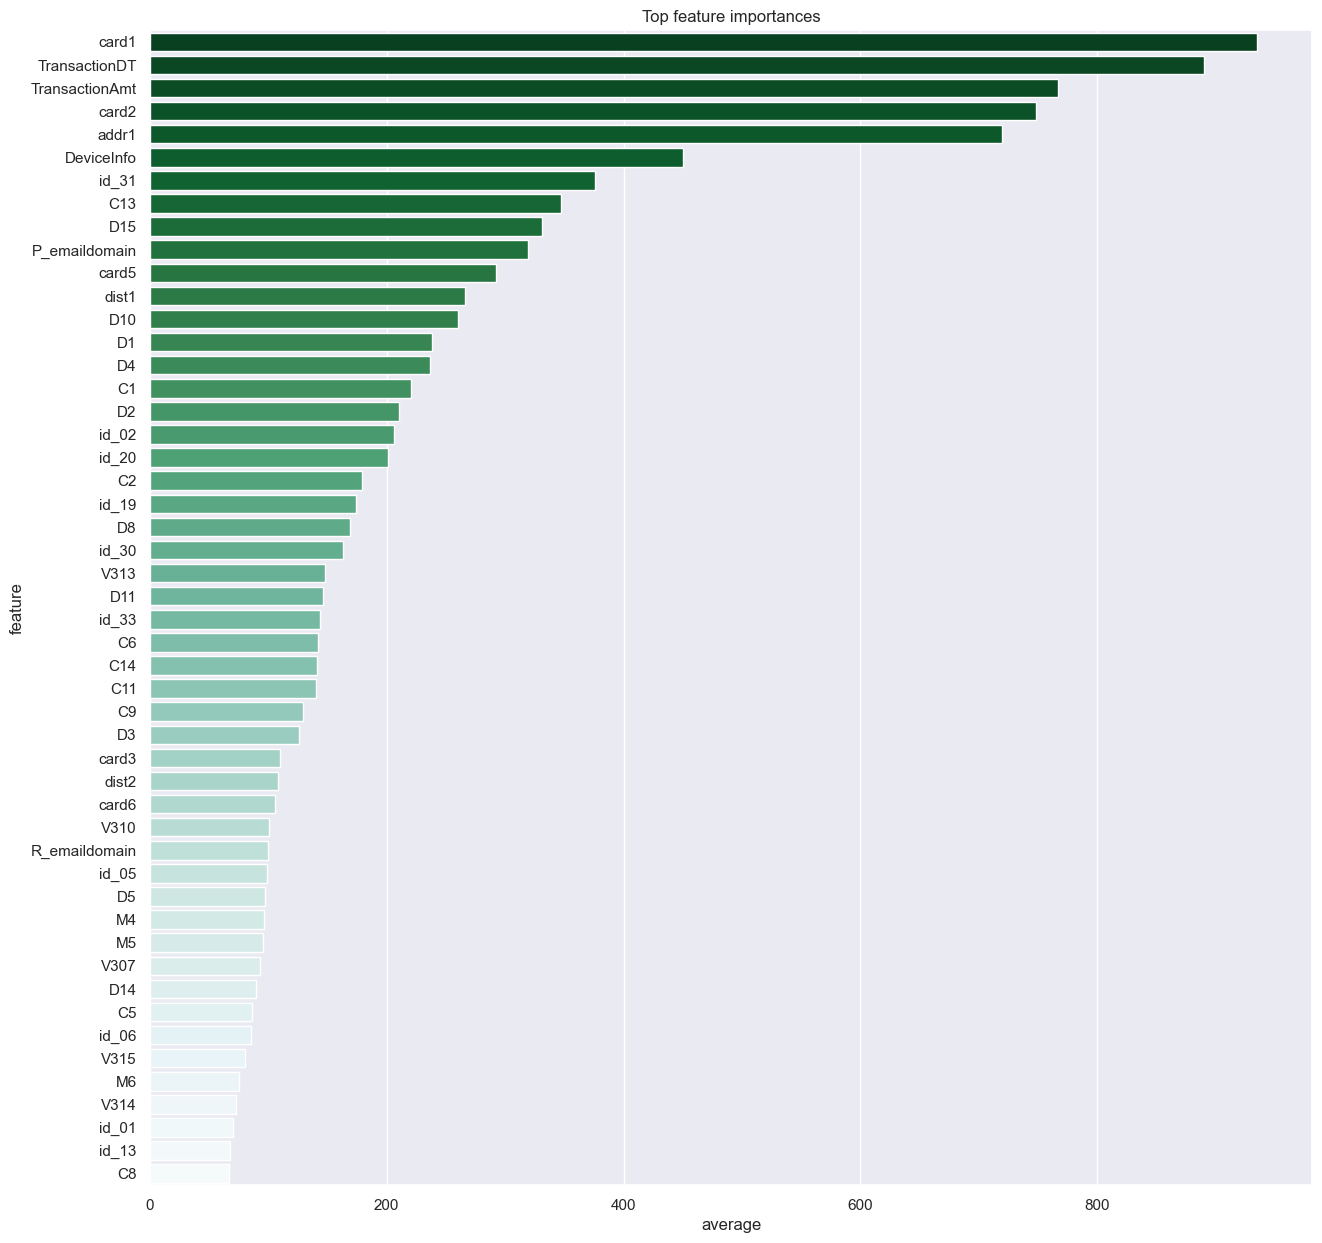

In [29]:
plot_feature_importances(feature_importances)

Как видно из графика, наибольшую важность имеют признаки: card1, TransactionDT, card2, TransactionAmt, addr1

Добавим несколько новых признаков

In [19]:
df_train_new = df_train.copy()
df_test_new = df_test.copy()

In [20]:
# Прологорифмируем TransactionAmt
df_train_new['TransactionAmt_log'] = np.log1p(df_train_new['TransactionAmt'])
df_test_new['TransactionAmt_log'] = np.log1p(df_test_new['TransactionAmt'])

# Одинаковые email отправителя и получателя
df_train_new['email_match'] = (
        df_train_new['P_emaildomain'].astype(str) == df_train_new['R_emaildomain'].astype(str)).astype(
    int)
df_test_new['email_match'] = (
        df_test_new['P_emaildomain'].astype(str) == df_test_new['R_emaildomain'].astype(str)).astype(int)

# Усредним расстояния
df_train_new['dist_avg'] = (df_train_new['dist1'] + df_train_new['dist2']) / 2
df_test_new['dist_avg'] = (df_test_new['dist1'] + df_test_new['dist2']) / 2

Из некоторых признаков выделим новые - частота встречаемости в выборке

In [21]:
for col in ['P_emaildomain', 'R_emaildomain', 'card1', 'card2']:
    card_freq = df_train_new[col].value_counts().to_dict()
    df_train_new['{}_cnt'.format(col)] = df_train_new[col].map(card_freq)
    df_test_new['{}_cnt'.format(col)] = df_test_new[col].map(card_freq)

Для card1, card2 выделим новые признаки: среднюю, медианную, максимальную и минимальную суммы покупок для каждой категории в `card1` и `card2`

In [22]:
for col in ['card1', 'card2']:
    for agg_type in ['mean', 'median', 'min', 'max']:
        agg_col_name = 'TransactionAmt_{}_{}'.format(col, agg_type)
        card_agg = df_train_new.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
        df_train_new = df_train_new.merge(card_agg, how='left', on=col)
        df_test_new = df_test_new.merge(card_agg, how='left', on=col)

Сонкатенируем признаки `card3` и `card5`, `addr1` и `addr2`

In [23]:
df_train_new['card3_card5'] = df_train_new['card3'].astype(str) + '_' + df_train_new['card5'].astype(str)
df_test_new['card3_card5'] = df_test_new['card3'].astype(str) + '_' + df_test_new['card5'].astype(str)

In [24]:
df_train_new['addr1_addr2'] = df_train_new['addr1'].astype(str) + '_' + df_train_new['addr2'].astype(str)
df_test_new['addr1_addr2'] = df_test_new['addr1'].astype(str) + '_' + df_test_new['addr2'].astype(str)

Кажется, что по отдельности признаки `C1`, `C2`, `C5`, `C6`, `C9` не сильно влияют на целевую переменную, попробуем их объединить

In [25]:
df_train_new['C1_C2_C5_C6_C9'] = (
        df_train_new['C1'].astype(str) +
        '_' + df_train_new['C2'].astype(str) +
        '_' + df_train_new['C5'].astype(str) +
        '_' + df_train_new['C6'].astype(str) +
        '_' + df_train_new['C9'].astype(str)
)
df_test_new['C1_C2_C5_C6_C9'] = (
        df_test_new['C1'].astype(str) +
        '_' + df_test_new['C2'].astype(str) +
        '_' + df_test_new['C5'].astype(str) +
        '_' + df_test_new['C6'].astype(str) +
        '_' + df_test_new['C9'].astype(str)
)

Выделим новый признак - время суток, когда была совершена транзакция

In [26]:
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'


df_train_new['TransactionDT'] = pd.to_datetime(df_train_new['TransactionDT'], unit='s')
df_train_new['TimeOfDay'] = df_train_new['TransactionDT'].dt.hour.apply(get_time_of_day)

df_test_new['TransactionDT'] = pd.to_datetime(df_test_new['TransactionDT'], unit='s')
df_test_new['TimeOfDay'] = df_test_new['TransactionDT'].dt.hour.apply(get_time_of_day)

Разобьем на фолды по месяцам

In [27]:
folds_idx = split_into_folds(df_train_new, useTimeDelta=True)

Посмотрим на бейзлайн с новыми признаками

In [28]:
cols_to_drop = ['TransactionID', 'TransactionAmt', 'TransactionDT']
df_train_new = df_train_new.drop(cols_to_drop, axis=1)
df_test_new = df_test_new.drop(cols_to_drop, axis=1)

label_encoders = {}
for col in ['TimeOfDay', 'card3_card5', 'C1_C2_C5_C6_C9', 'addr1_addr2']:
    le = LabelEncoder()
    le.fit(pd.concat([df_train_new, df_test_new], axis=0)[col].astype(str))
    df_train_new[col] = le.transform(df_train_new[col].astype(str))
    df_test_new[col] = le.transform(df_test_new[col].astype(str))
    label_encoders[col] = le

C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Python311\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 0, AUC-ROC: 0.90495
Fold 1, AUC-ROC: 0.93509
Fold 2, AUC-ROC: 0.93461
Fold 3, AUC-ROC: 0.91547
CV AUC-ROC: 0.92253


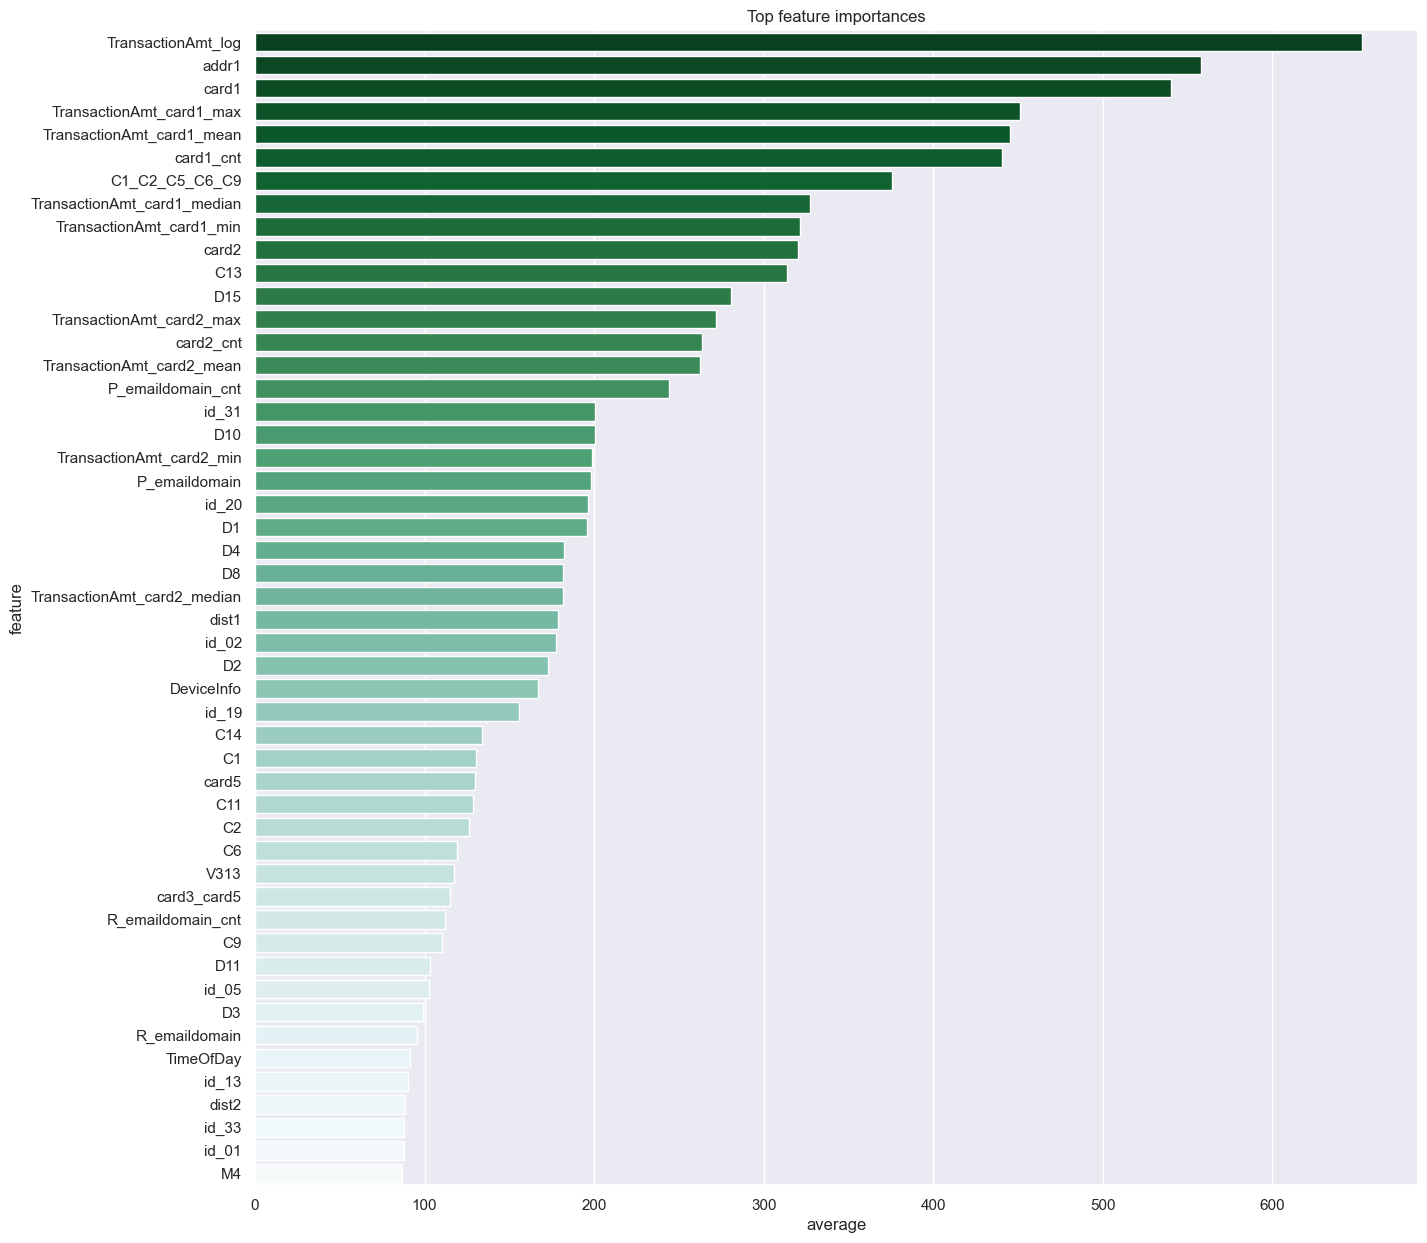

In [39]:
plot_feature_importances(train_baseline(df_train_new, df_test_new))

### Выводы

Первым делом я уменьшил размер датасета, а также заполнил пропуски некоторых признаков:
- для количественных признаков C1-C14 и V1-V45 медианой
- для категориальных M1-M9 модой
- `card4`, `card6` и `addr1` модой
- остальные признаки `-1`, `0` или `min-1`

Целевой признак `isFraud` имеет неравномерное распределение, сильный перекос у нормальных транзакция, что логично. Мошеннических транзакций около 3.5%.

Оценена линейная связь числовых признаков с целевой переменной, большую связь имеют V-признаки.
Среди категориальных признаков по статистике ХИ-квадрат набольшую связь имеет признак `DeviceInfo`.

Пропуски для категориальных признаков были заполнены новой категорией `unknown` и построен первый бейзлайн для оценки важности признаков. Наибольшую важность имеют признаки: `card1`, `TransactionDT`, `card2`, `TransactionAmt`, `addr1` (`ROC-AUC = 0.91703`).

В дальнейшем были сгенерированы новые признаки на основе старых, а также заменили `TransactionAmt` на логарифмированный признак, чтобы приблизить его распределение к нормальному. Итоговый бейзлайн, построенный на новых признаках, показал `ROC-AUC = 0.92253`

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [40]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score

In [41]:
RANDOM_SEED = 13
RANDOM_STATE = 42

In [42]:
X_train = df_train_new.drop(['isFraud'], axis=1)
y_train = df_train_new['isFraud']

In [43]:
lgbm_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': RANDOM_SEED,
}

lgbm_model = LGBMClassifier(**lgbm_params)

In [31]:
catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 5,
    'l2_leaf_reg': 3,
    'eval_metric': 'AUC',
    'random_seed': RANDOM_SEED,
    'verbose': False,
    'cat_features': df_train_new.select_dtypes(exclude='number').columns.to_list(),
    'task_type': 'GPU',
    'devices': '0',
}

catboost_model = CatBoostClassifier(**catboost_params)

In [32]:
rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbose': 0
}

rf_model = RandomForestClassifier(**rf_params)

Используем KFold с 5 фолдами для оценки качества на кросс-валидации

In [44]:
def evaluate_model_cv(model, X, y, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    return np.mean(scores)

In [80]:
lgbm_cv_score = evaluate_model_cv(lgbm_model, X_train, y_train)

[LightGBM] [Info] Number of positive: 11740, number of negative: 322307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37053
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 436
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035145 -> initscore=-3.312503
[LightGBM] [Info] Start training from score -3.312503
[LightGBM] [Info] Number of positive: 11801, number of negative: 322246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.173255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37014
[LightGBM] [Info] Number of data points in the train set: 334047, number of used features: 435
[LightGBM]

In [81]:
catboost_cv_score = evaluate_model_cv(catboost_model, X_train, y_train)

Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


In [49]:
rf_cv_score = evaluate_model_cv(rf_model, X_train, y_train)

In [46]:
lgbm_model.fit(X_train, y_train)
pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': lgbm_model.predict_proba(df_test_new)[:, 1]
}).to_csv(
    'lgbm_submission.csv', index=False)

[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37179
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 437
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


In [85]:
catboost_model.fit(X_train, y_train)
pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'], 'isFraud': catboost_model.predict_proba(df_test_new)[:, 1]
}).to_csv(
    'catboost_submission.csv', index=False)

Default metric period is 5 because AUC is/are not implemented for GPU


In [86]:
rf_model.fit(X_train, y_train)
pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'], 'isFraud': rf_model.predict_proba(df_test_new)[:, 1]
}).to_csv(
    'rf_submission.csv', index=False)

In [53]:
pd.DataFrame({
    'Модель': ['LightGBM', 'CatBoost', 'Random Forest'],
    'AUC на кросс-валидации': [lgbm_cv_score, catboost_cv_score, rf_cv_score],
    'AUC на лидерборде': [0.90292, 0.88773, 0.86228],
    'Параметры модели': [str(lgbm_params), str(catboost_params), str(rf_params)]
})

,Модель,AUC на кросс-валидации,AUC на лидерборде,Параметры модели
0,LightGBM,0.971325,0.90292,"{'objective': 'binary', 'boosting_type': 'gbdt..."
1,CatBoost,0.919643,0.88773,"{'iterations': 1000, 'learning_rate': 0.05, 'd..."
2,Random Forest,0.872095,0.86228,"{'n_estimators': 200, 'max_depth': 10, 'min_sa..."


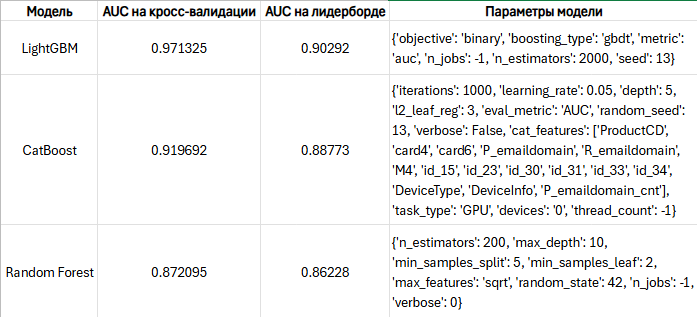


# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [48]:
CONTAMINATION = 0.03

In [49]:
def train_and_predict(model, X_train, y_train, df_test, sample_submission, filename):
    anomalies = model.fit_predict(df_train_new)
    X_train_anomaly = X_train[anomalies == 1]
    y_train_anomaly = y_train[anomalies == 1]

    lgbm_model.fit(X_train_anomaly, y_train_anomaly)
    test_predictions = lgbm_model.predict_proba(df_test)[:, 1]

    pd.DataFrame({
        'TransactionID': sample_submission['TransactionID'], 'isFraud': test_predictions
    }).to_csv(filename, index=False)

    return evaluate_model_cv(lgbm_model, X_train_anomaly, y_train_anomaly)

Isolation Forest

In [51]:
iso_cv_score = train_and_predict(IsolationForest(contamination=CONTAMINATION, random_state=RANDOM_STATE), X_train,
                                 y_train,
                                 df_test_new, sample_submission, 'lgbm_iso_submission.csv')

[LightGBM] [Info] Number of positive: 11726, number of negative: 393306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.335968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34757
[LightGBM] [Info] Number of data points in the train set: 405032, number of used features: 436
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028951 -> initscore=-3.512779
[LightGBM] [Info] Start training from score -3.512779
[LightGBM] [Info] Number of positive: 9286, number of negative: 314739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.178726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34818
[LightGBM] [Info] Number of data points in the train set: 324025, number of used features: 435
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028658 -> initscore=-3.52

Local Outlier Factor (LOF)

In [52]:
lof_cv_score = train_and_predict(LocalOutlierFactor(n_neighbors=20, contamination=CONTAMINATION), X_train, y_train,
                                 df_test_new,
                                 sample_submission, 'lgbm_lof_submission.csv')

[LightGBM] [Info] Number of positive: 14268, number of negative: 390764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.170242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36898
[LightGBM] [Info] Number of data points in the train set: 405032, number of used features: 437
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035227 -> initscore=-3.310085
[LightGBM] [Info] Start training from score -3.310085
[LightGBM] [Info] Number of positive: 11316, number of negative: 312709
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.280842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36939
[LightGBM] [Info] Number of data points in the train set: 324025, number of used features: 435
[LightGBM]

In [53]:
pd.DataFrame({
    'Модель': ['Isolation Forest', 'LOF'],
    'AUC на кросс валидации': [iso_cv_score, lof_cv_score],
    'AUC на лидерборде': [0.89665, 0.89848],
})

,Модель,AUC на кросс валидации,AUC на лидерборде
0,Isolation Forest,0.963042,0.89665
1,LOF,0.970680,0.89848


### Выводы
Для поиска аномалий я использовал 2 метода: `Isolation Forest` и `Local Outlier Factor`. Я пробовал так же обучить `One-Class SVM` и `Elliptic Envelope`, но первый обучался очень долго, а второму не хватило памяти при обучении.

Как видно из таблицы с результатами, удаление аномалий не улучшило качество моделей на лидерборде и кросс валидации.

### Попробуем подобрать гиперпараметры с помощью optuna

In [50]:
import optuna

LGBM

In [97]:
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators': 3000,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'metric': 'auc',
        'n_jobs': -1,
        'random_state': RANDOM_SEED,
        'verbose': -1,
    }
    model = LGBMClassifier(**params)

    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

lgbm_best_params = study.best_params
print('Лучшие гиперпараметры:', lgbm_best_params)

lgbm_best_params.update({
    'n_estimators': 3000,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'random_state': RANDOM_SEED,
    'verbose': -1,
})

optuna_lgbm_model = LGBMClassifier(**lgbm_best_params)
optuna_lgbm_model.fit(X_train, y_train)

test_predictions = optuna_lgbm_model.predict_proba(df_test_new)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('lgbm_optuna_submission.csv', index=False)

[I 2025-03-15 00:25:49,895] Trial 0 finished with value: 0.9036709131492496 and parameters: {'num_leaves': 173, 'learning_rate': 0.03831920169369543, 'max_depth': 8, 'min_child_samples': 60, 'subsample': 0.7158930969473457, 'colsample_bytree': 0.9747349845098618, 'reg_alpha': 0.30325560995365475, 'reg_lambda': 0.052518455274587206}. Best is trial 0 with value: 0.9036709131492496.
[I 2025-03-15 00:28:49,228] Trial 1 finished with value: 0.8946418845074656 and parameters: {'num_leaves': 30, 'learning_rate': 0.2676177004419657, 'max_depth': 5, 'min_child_samples': 55, 'subsample': 0.8068182226798604, 'colsample_bytree': 0.7890208660665319, 'reg_alpha': 0.6281569105881353, 'reg_lambda': 0.3913710485495103}. Best is trial 0 with value: 0.9036709131492496.
[I 2025-03-15 00:37:44,211] Trial 2 finished with value: 0.9170880310299104 and parameters: {'num_leaves': 150, 'learning_rate': 0.012127121383155555, 'max_depth': 15, 'min_child_samples': 16, 'subsample': 0.93459114350006, 'colsample_bytr

Лучшие гиперпараметры: {'num_leaves': 175, 'learning_rate': 0.010203959463015153, 'max_depth': 11, 'min_child_samples': 29, 'subsample': 0.9595377318249911, 'colsample_bytree': 0.7008023302141809, 'reg_alpha': 0.7369604631780851, 'reg_lambda': 0.6668252470437909}
[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.231642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37023
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 435
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


Catboost

In [48]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'eval_metric': 'AUC',
        'random_seed': RANDOM_SEED,
        'verbose': False,
        'cat_features': df_train_new.select_dtypes(exclude='number').columns.to_list(),
        'task_type': 'GPU',
        'devices': '0',
    }

    model = CatBoostClassifier(**params)

    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

catboost_best_params = study.best_params
print('Лучшие гиперпараметры:', catboost_best_params)

catboost_best_params.update({
    'eval_metric': 'AUC',
    'random_seed': RANDOM_SEED,
    'verbose': False,
    'cat_features': df_train_new.select_dtypes(exclude='number').columns.to_list(),
    'task_type': 'GPU',
    'devices': '0',
})

catboost_model = CatBoostClassifier(**catboost_best_params)
catboost_model.fit(X_train, y_train)

test_predictions = catboost_model.predict_proba(df_test_new)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('catboost_optuna_submission.csv', index=False)

[I 2025-03-15 11:49:41,227] A new study created in memory with name: no-name-b50bc5d1-0486-4c9a-a53c-2b8c4d699e8d
[I 2025-03-15 11:52:33,009] Trial 0 finished with value: 0.8928334682481003 and parameters: {'iterations': 1827, 'learning_rate': 0.06023818443942792, 'depth': 4}. Best is trial 0 with value: 0.8928334682481003.
[I 2025-03-15 11:54:27,055] Trial 1 finished with value: 0.8764384213009322 and parameters: {'iterations': 1897, 'learning_rate': 0.013481812137813885, 'depth': 4}. Best is trial 0 with value: 0.8928334682481003.
[I 2025-03-15 11:55:36,992] Trial 2 finished with value: 0.8637070437850732 and parameters: {'iterations': 593, 'learning_rate': 0.018634635754422115, 'depth': 4}. Best is trial 0 with value: 0.8928334682481003.
[I 2025-03-15 12:03:54,699] Trial 3 finished with value: 0.915369561942254 and parameters: {'iterations': 1661, 'learning_rate': 0.028239830074159606, 'depth': 10}. Best is trial 3 with value: 0.915369561942254.
[I 2025-03-15 12:18:43,980] Trial 4 f

Лучшие гиперпараметры: {'iterations': 1661, 'learning_rate': 0.028239830074159606, 'depth': 10}


Default metric period is 5 because AUC is/are not implemented for GPU


Random Forest

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        # 'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        # 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': RANDOM_STATE,
        'n_jobs': -1,
        'verbose': 0,
    }

    model = RandomForestClassifier(**params)

    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

rf_best_params = study.best_params
print('Лучшие гиперпараметры:', rf_best_params)

rf_best_params.update({
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbose': 0,
})

rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)

test_predictions = rf_model.predict_proba(df_test_new)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('rf_optuna_submission.csv', index=False)

Попробуем теперь Stacking с Логистической регрессией в качестве мета-алгоритма

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lgbm', optuna_lgbm_model),
        ('catboost', catboost_model)
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    cv=3,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)
test_predictions = stacking_model.predict_proba(df_test_new)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('stacking_submission.csv', index=False)

Попробуем обучить stacking на датасете с удаленными аномалиями, найденными с помощью `Isolation Forest`

In [44]:
def find_anomalies(X_train, contamination=CONTAMINATION):
    iso_forest = IsolationForest(contamination=contamination, random_state=RANDOM_SEED)
    return iso_forest.fit_predict(X_train)


anomalies = find_anomalies(X_train, 0.03)
X_train_anomaly = X_train[anomalies == 1]
y_train_anomaly = y_train[anomalies == 1]

stacking_model.fit(X_train_anomaly, y_train_anomaly)
test_predictions = stacking_model.predict_proba(df_test_new)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('stacking_anomalies_submission.csv', index=False)

Stacking показал лучшее качество, по сравнению с моделями по отдельности. `ROC-AUC = 0.925`. Аутпуты в некоторых ячейках не сохранились, потому что обучение было долгим, компьютер перезагружался, запускать все ячейки заново было не целесообразно

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [59]:
import umap.umap_ as umap
from sklearn.cluster import HDBSCAN

Обучим HDBSCAN, чтобы увеличить скорость обучения воспользуемся `StandardScaler` и снижением размерности с помощью `UMAP`

In [ ]:
X_train_clustered = X_train.copy()
df_test_new_clustered = df_test_new.copy()
df_test_new_clustered.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_clustered)
X_test_scaled = scaler.transform(df_test_new_clustered)

reducer = umap.UMAP(n_components=10, random_state=RANDOM_STATE)
X_reduced = reducer.fit_transform(X_scaled)
X_test_reduced = reducer.transform(X_test_scaled)

hdbscan_clusterer = HDBSCAN(min_cluster_size=2)
X_train_clustered['hdbscan_cluster'] = hdbscan_clusterer.fit_predict(X_reduced)
df_test_new_clustered['hdbscan_cluster'] = hdbscan_clusterer.fit_predict(X_test_reduced)

Добавим шумовые точки как новый признак

In [65]:
X_train_clustered['hdbscan_noise'] = (X_train_clustered['hdbscan_cluster'] == -1).astype(int)

In [73]:
clustered_lgbm_model = LGBMClassifier(**lgbm_best_params)
clustered_lgbm_model.fit(X_train_clustered, y_train)

test_predictions = clustered_lgbm_model.predict_proba(df_test_new_clustered)[:, 1]

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('clustered_lgbm_model_submission.csv', index=False)

### Вывод

Качество в результате добавления шумов после кластеризации осталось достаточно высоким, но чуть меньше, чем качество стэкинга. На лидерборде `ROC-AUC = 0.92`

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

Я решил воспользоваться `autogluon`, так как у него нет проблем с установкой зависимостей, в отличие от других библиотек, которыми я пытался воспользоваться

In [ ]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='isFraud', eval_metric='roc_auc').fit(
    train_data=df_train_new,
    time_limit=600,
    presets='best_quality',
    verbosity=1
)

In [82]:
test_proba = predictor.predict_proba(df_test_new)

if isinstance(test_proba, pd.DataFrame):
    if 1 in test_proba.columns:
        test_predictions = test_proba[1]
    else:
        test_predictions = test_proba.iloc[:, -1]
else:
    test_predictions = test_proba

pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': test_predictions
}).to_csv('autogluon_submission.csv', index=False)

C:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


          0         1
0  0.999164  0.000836
1  0.842777  0.157223
2  0.987289  0.012711
3  0.996911  0.003089
4  0.428783  0.571217


In [83]:
leaderboard = predictor.leaderboard()
print(leaderboard)

                 model  score_val eval_metric  pred_time_val    fit_time  \
0    LightGBMXT_BAG_L2   0.960346     roc_auc      77.899165  347.349487   
1  WeightedEnsemble_L3   0.960346     roc_auc      77.965166  353.957382   
2    LightGBMXT_BAG_L1   0.953484     roc_auc      56.599775  208.002179   
3  WeightedEnsemble_L2   0.953484     roc_auc      56.690285  213.085370   
4      LightGBM_BAG_L2   0.944490     roc_auc      64.572677  280.942153   
5      LightGBM_BAG_L1   0.798730     roc_auc       5.288010   41.561715   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0               16.011381          97.785593            2       True   
1                0.066001           6.607896            3       True   
2               56.599775         208.002179            1       True   
3                0.090511           5.083190            2       True   
4                2.684893          31.378258            2       True   
5                5.288010          

### Вывод

Качество на лидерборде не самое лучшее, но достаточно хорошее: на лидерборде `ROC-AUC = 0.90896`

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

Я использовал Yandex Datasphere c kernel c1.32 (CPU x32, RAM 256) для обучения stacking на Random Forest, Catboost, LightGBM. Как видно из картинки в Yandex Datasphere ячейка выполнилась за 25 минут, на моём локальном компьюетере ячейка выполнилась за 1.5 часа. То есть в удалённом ноутбуке скорость была в 6 раз больше.

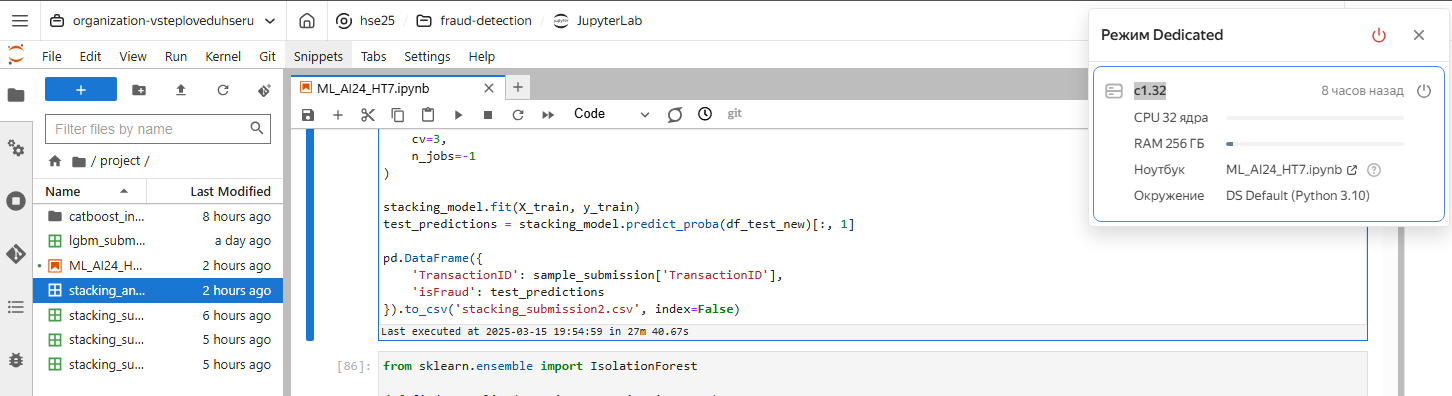

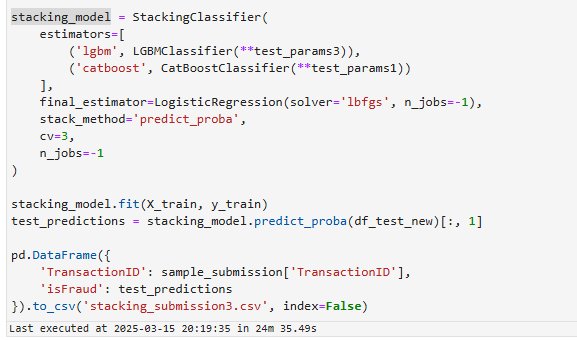

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

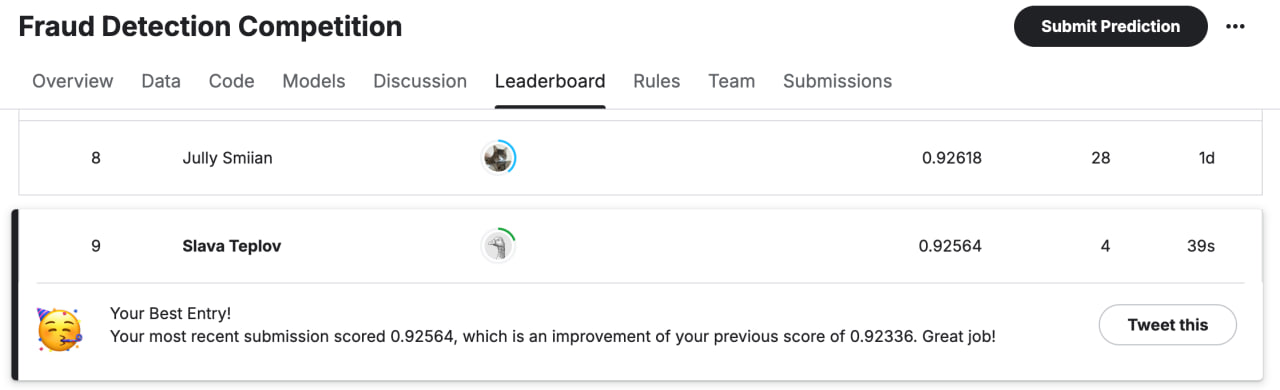